Problem Statement: Analyzing Weather Data from OpenWeatherMap API 
Tasks to Perform: 
1. Register and obtain API key from OpenWeatherMap. 
2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for 
a specific location. 
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and 
precipitation from the API response. 
4. Clean and preprocess the retrieved data, handling missing values or inconsistent 
formats. 
5. Perform data modeling to analyze weather patterns, such as calculating average 
temperature, maximum/minimum values, or trends over time. 
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or 
scatter plots, to represent temperature changes, precipitation levels, or wind speed 
variations. 
7. Apply data aggregation techniques to summarize weather statistics by specific time 
periods (e.g., daily, monthly, seasonal). 
8. Incorporate geographical information, if available, to create maps or geospatial 
visualizations representing weather patterns across different locations. 
9. Explore and visualize relationships between weather attributes, such as temperature 
and humidity, using correlation plots or heatmaps. 

API Key: c97ce3f14be7bcf7b544743c2fc6056c

In [1]:
#Step 1: Import required libraries
import requests                 
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns           
from datetime import datetime   

plt.style.use('seaborn-v0_8')


In [2]:
#Step 2: Define the API key and location

API_KEY = "c97ce3f14be7bcf7b544743c2fc6056c"  
CITY_NAME = "Kochi"            
UNITS = "metric"               

BASE_URL = "https://api.openweathermap.org/data/2.5/forecast"

In [3]:
#Step 3: Fetch weather data from the API

params = {
    "q": CITY_NAME,
    "appid": API_KEY,
    "units": UNITS
}

response = requests.get(BASE_URL, params=params)

if response.status_code == 200:
    data = response.json()
    print(f"Successfully fetched weather data for {CITY_NAME}")
else:
    print("Failed to fetch data:", response.status_code, response.text)


Successfully fetched weather data for Kochi


In [4]:
# Step 4: Extract relevant weather attributes from the API response

# The forecast data is inside data['list']
weather_list = data['list']

# Create a dataframe from the list
weather_data = pd.json_normalize(weather_list)

# Select only the relevant columns
weather_data = weather_data[["dt_txt", "main.temp", "main.humidity", "wind.speed", "weather"]]

# Extract weather description
weather_data["weather"] = weather_data["weather"].apply(lambda x: x[0]["description"])

# Convert 'dt_txt' column to datetime type
weather_data["dt_txt"] = pd.to_datetime(weather_data["dt_txt"])

# Rename columns for readability
weather_data.rename(columns={
    "dt_txt": "datetime",
    "main.temp": "temperature",
    "main.humidity": "humidity",
    "wind.speed": "wind_speed",
}, inplace=True)

# Show first few rows
weather_data.head()


,datetime,temperature,humidity,wind_speed,weather
0,2025-10-08 09:00:00,26.68,73,3.67,light rain
1,2025-10-08 12:00:00,26.72,79,3.46,light rain
2,2025-10-08 15:00:00,25.74,85,1.68,moderate rain
3,2025-10-08 18:00:00,24.00,94,2.33,light rain
4,2025-10-08 21:00:00,24.08,89,1.87,overcast clouds


In [5]:
#Step 5: Clean and preprocess data

print("Missing values before cleaning:")
print(weather_data.isnull().sum())

weather_data.fillna(method='ffill', inplace=True)

print("\nMissing values after cleaning:")
print(weather_data.isnull().sum())

weather_data.info()

Missing values before cleaning:
datetime       0
temperature    0
humidity       0
wind_speed     0
weather        0
dtype: int64

Missing values after cleaning:
datetime       0
temperature    0
humidity       0
wind_speed     0
weather        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     40 non-null     datetime64[ns]
 1   temperature  40 non-null     float64       
 2   humidity     40 non-null     int64         
 3   wind_speed   40 non-null     float64       
 4   weather      40 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.7+ KB


C:\Users\Prafull Satle\AppData\Local\Temp\ipykernel_15176\2416937720.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data.fillna(method='ffill', inplace=True)


In [6]:
#Step 6: Perform basic data modeling and descriptive analysis

print("Basic Weather Statistics:")
print(weather_data[["temperature", "humidity", "wind_speed"]].describe())

avg_temp = weather_data["temperature"].mean()
print(f"\n Average Temperature in {CITY_NAME}: {avg_temp:.2f} °C")

Basic Weather Statistics:
       temperature   humidity  wind_speed
count    40.000000  40.000000   40.000000
mean     26.215250  80.800000    2.303500
std       1.294769   6.247871    0.940877
min      23.800000  69.000000    0.480000
25%      25.207500  75.000000    1.557500
50%      26.155000  81.500000    2.250000
75%      27.337500  86.000000    2.942500
max      28.570000  94.000000    4.340000

 Average Temperature in Kochi: 26.22 °C


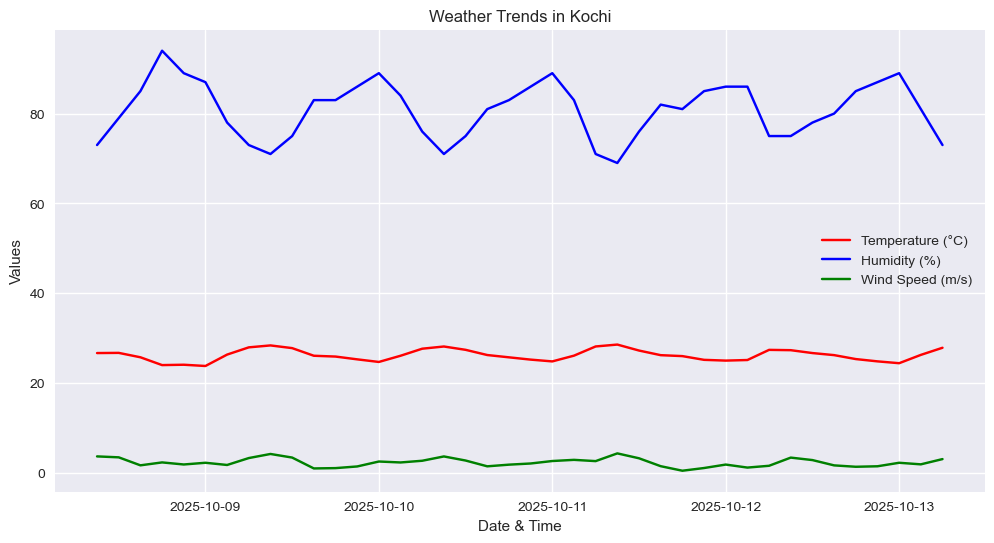

In [7]:
#Step 7: Visualize temperature, humidity, and wind speed trends over time

plt.figure(figsize=(12, 6))
plt.plot(weather_data["datetime"], weather_data["temperature"], label="Temperature (°C)", color='red')
plt.plot(weather_data["datetime"], weather_data["humidity"], label="Humidity (%)", color='blue')
plt.plot(weather_data["datetime"], weather_data["wind_speed"], label="Wind Speed (m/s)", color='green')
plt.title(f"Weather Trends in {CITY_NAME}")
plt.xlabel("Date & Time")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


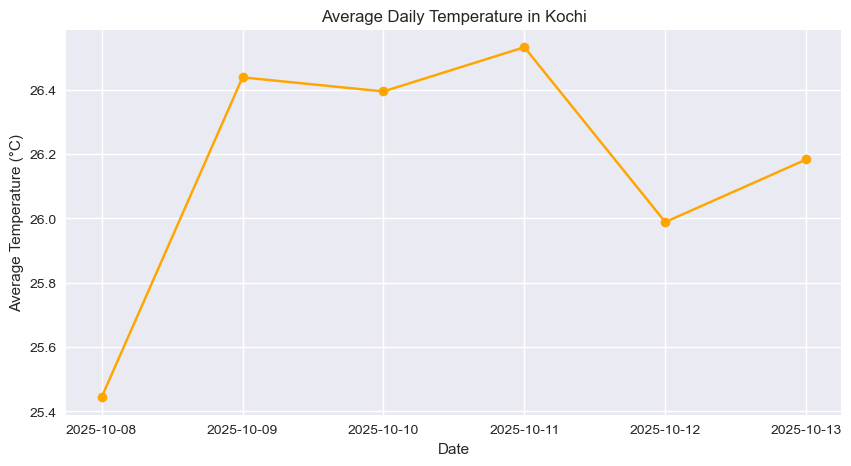

In [8]:
#Step 8: Aggregate data by day to analyze daily averages

weather_data["date"] = weather_data["datetime"].dt.date
daily_avg = weather_data.groupby("date")[["temperature", "humidity", "wind_speed"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(daily_avg["date"], daily_avg["temperature"], marker='o', color='orange')
plt.title(f"Average Daily Temperature in {CITY_NAME}")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()


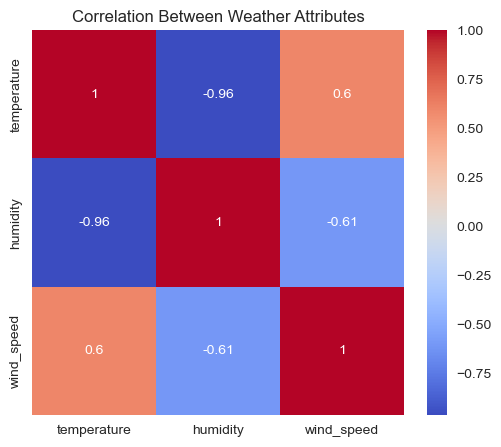

In [9]:
#Step 9: Explore relationships between weather attributes

plt.figure(figsize=(6, 5))
sns.heatmap(weather_data[["temperature", "humidity", "wind_speed"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Weather Attributes")
plt.show()
